DATA UNDERSTANDING & EXPLORATION

In [5]:
# Data Extraction

import zipfile
import os

zip_path = 'C:\\Users\\a\\OneDrive\\Desktop\\pythonclass\\household_power_consumption.zip'  
extract_dir = 'data'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print("Extraction completed!")

print("Files inside extracted folder:", os.listdir(extract_dir))


Extraction completed!
Files inside extracted folder: ['household_power_consumption.txt']


In [7]:
# Loading and converting the data into CSV file to Read

import pandas as pd

file_path = 'data/household_power_consumption.txt'

df = pd.read_csv(
    file_path,
    sep=';',
    na_values='?',
    low_memory=False
)

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('Datetime', inplace=True)


df.head()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
# To Check data types and null values
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

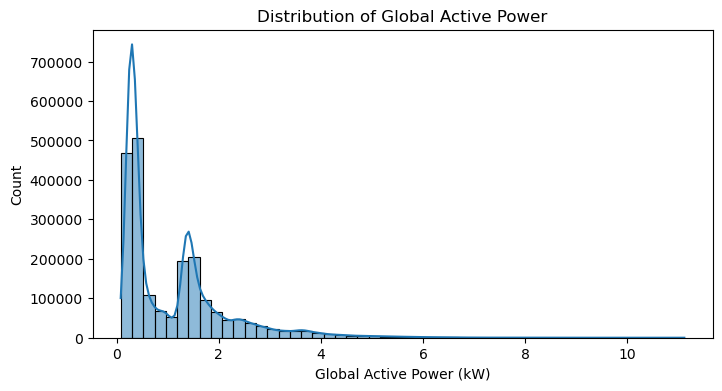

In [11]:
# to Identify the varible distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['Global_active_power'], kde=True, bins=50)
plt.title("Distribution of Global Active Power")
plt.xlabel("Global Active Power (kW)")
plt.show()


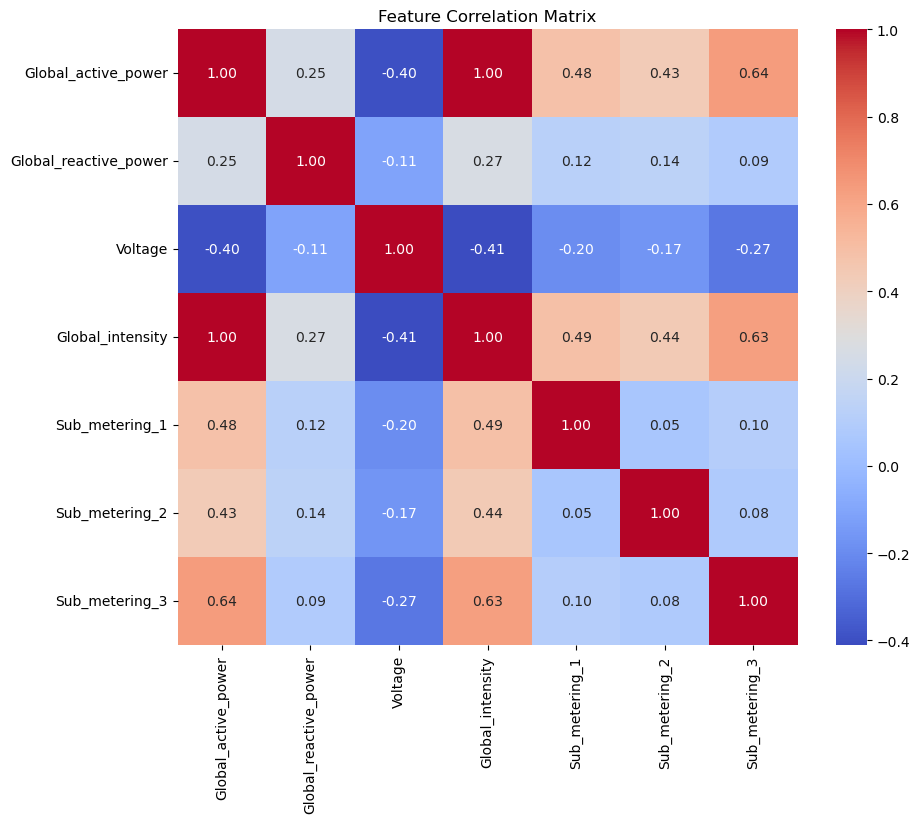

In [13]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


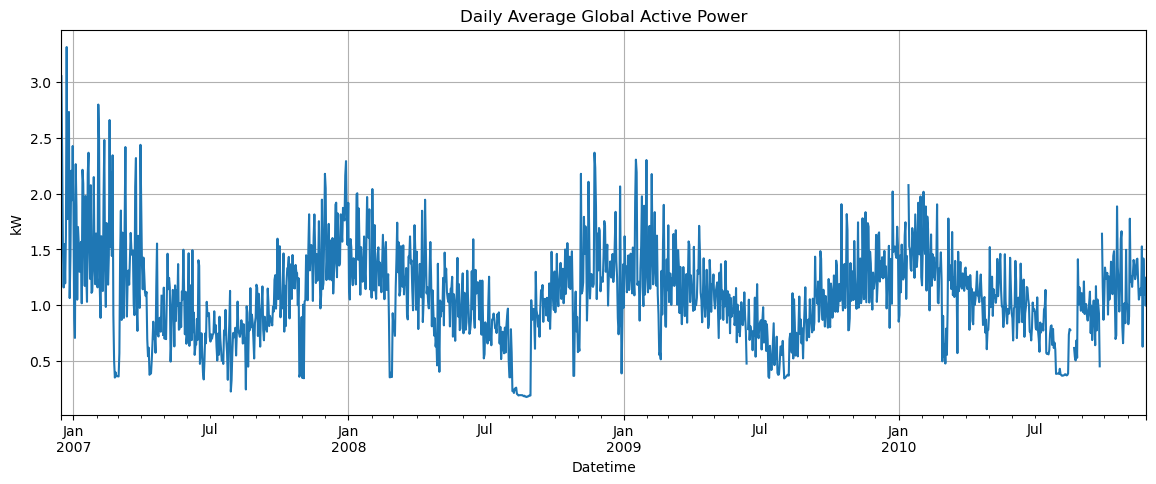

In [15]:
# Daily power usage consumptions

df_daily = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(14, 5))
df_daily.plot()
plt.title("Daily Average Global Active Power")
plt.ylabel("kW")
plt.grid(True)
plt.show()


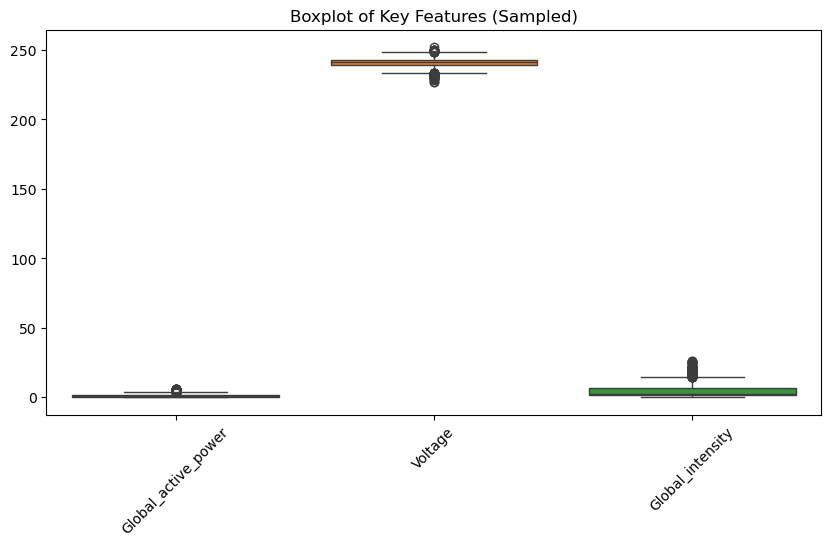

In [17]:
#Outlier Detection
# Sample only 2000 rows for faster plotting
df_sample = df[['Global_active_power', 'Voltage', 'Global_intensity']].sample(2000, random_state=42)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample)
plt.title("Boxplot of Key Features (Sampled)")
plt.xticks(rotation=45)
plt.show()



<Figure size 1400x600 with 0 Axes>

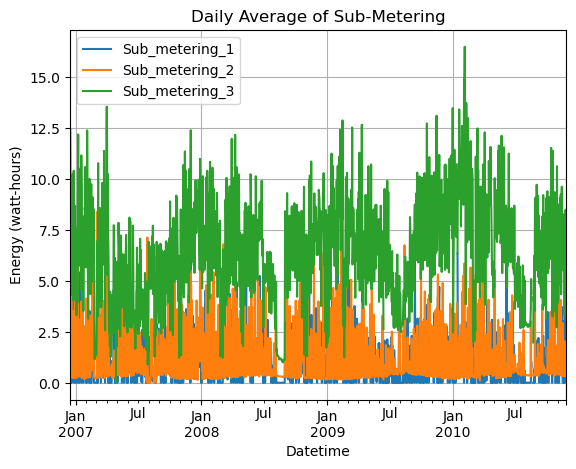

In [19]:
#Sub-Metering Comparison

plt.figure(figsize=(14, 6))
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').mean().plot()
plt.title("Daily Average of Sub-Metering")
plt.ylabel("Energy (watt-hours)")
plt.grid(True)
plt.show()


DATA PREPROCESSING

In [21]:
# To handle the missing data
df.dropna(inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [23]:
# parse date and time
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek

In [27]:
# Additional Features
df_daily = df.resample('D').mean()
df_daily['rolling_avg_power'] = df_daily['Global_active_power'].rolling(window=3).mean()
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [29]:
#Model Performance
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Global_active_power', 'Global_reactive_power', 
                    'Voltage', 'Global_intensity', 
                    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,day_of_week,is_peak_hour
Datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,17,16,12,2006,5,0
2006-12-16 17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,17,16,12,2006,5,0
2006-12-16 17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,17,16,12,2006,5,0
2006-12-16 17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,17,16,12,2006,5,0
2006-12-16 17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,17,16,12,2006,5,0


FEATURE ENGINEERING

In [31]:
# predicting global active power consumptions

selected_features = [
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'hour',
    'day_of_week',
    'month',
    'is_peak_hour',
]

# Drop missing values and align target
X = df[selected_features].dropna()
y = df['Global_active_power'].loc[X.index]


MODEL SELECTION & TRAINING

In [33]:
#to split the Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [37]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [39]:
#Neural Network Regressor (MLP)

from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [41]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

X_train_small = X_train.sample(10000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]


rf_model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

rf_model.fit(X_train_small, y_train_small)


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

MODEL EVALUATION

In [43]:
#Evaluate models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Neural Network': mlp_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))



Linear Regression
RMSE: 0.0036393270183522697
MAE : 0.00232936298140334
R² Score: 0.9985621692477556

Random Forest
RMSE: 0.0036488604016003774
MAE : 0.0020379702977931613
R² Score: 0.9985546264547575

Gradient Boosting
RMSE: 0.0030562824823691854
MAE : 0.0019055262967821005
R² Score: 0.9989859658313531

Neural Network
RMSE: 0.004587395129401046
MAE : 0.0034849835969215487
R² Score: 0.9977154645423844


In [47]:
#hyperparameter tuning(Random Forest)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_sample = X_train.sample(5000, random_state=42)
y_sample = y_train.loc[X_sample.index]


param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [5, 10, None]
}


random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)


random_search.fit(X_sample, y_sample)
print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_


Best Parameters: {'max_depth': None, 'n_estimators': 101}


In [49]:
best_rf 

RandomForestRegressor(n_estimators=101, random_state=42)

VISUALIZATION

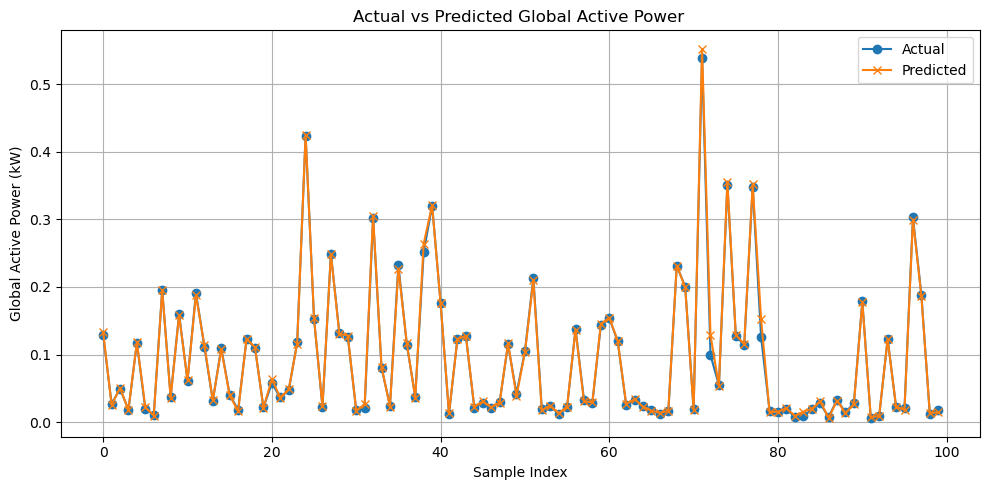

In [57]:
#Actual vs Predicted Plot


import matplotlib.pyplot as plt

model = best_rf

# Predict on test data
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Global Active Power ")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


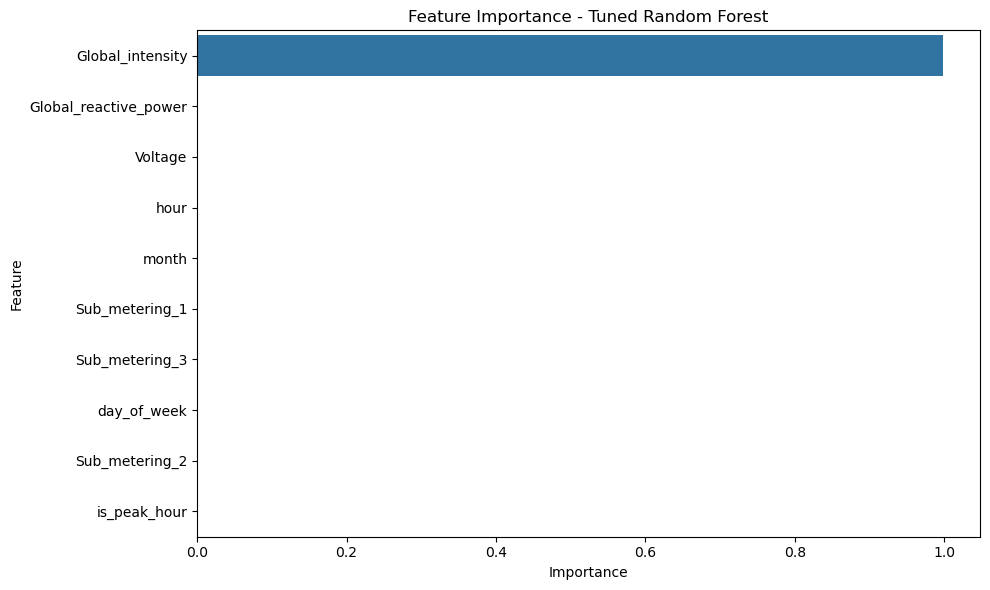

In [53]:
#Feature Importance (Random Forest)

import seaborn as sns
import pandas as pd

# Get feature importances
importances = best_rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Tuned Random Forest")
plt.tight_layout()
plt.show()


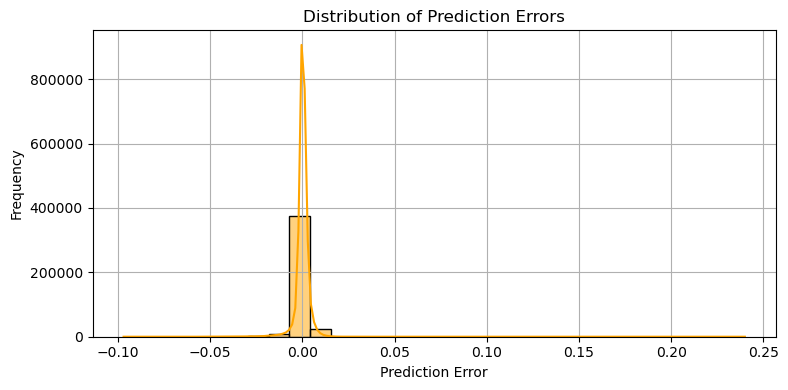

In [55]:
#Prediction Errors

errors = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, bins=30, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
